In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
df= pd.read_csv("SMS-Messages2.csv")
df.head()
df.info()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 Message       200 non-null object
Class_Label    200 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [4]:
df.groupby('Class_Label').count()

,Message
Class_Label,
ham,167
spam,33


In [5]:
#Removing short words having length of three
df[' Message'] = df[' Message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [6]:
#Converting all letters into lower case NORMLIZATION
df[' Message'] = df[' Message'].astype(str).str.lower()

In [7]:
df.head()

,Message,Class_Label
0,until jurong point,ham
1,lar... joking oni...',ham
2,'free entry wkly comp final tkts 21st 2005. te...,spam
3,early hor... already then say...',ham
4,'nah don\'t think goes,ham


In [8]:
df.tail()

,Message,Class_Label
195,'how doing? hope you\'ve settled school year. ...,ham
196,'gud mrng dear nice day',ham
197,'did that persons story',ham
198,your hamster dead? meet orchard mrt?,ham
199,kate your evening? hope tomorrow have bloody b...,ham


In [173]:
#df1 =  df[["Message","Class_Label"]]

In [9]:
#Dumming Coding
df['Class_Label']= df['Class_Label'].map({'ham':0,'spam':1}).astype(int)

In [10]:
#Shuffling rows of the dataframe
df1 = df.reindex(np.random.permutation(df.index))

In [120]:
# To split the data set in to parts
train=df1.sample(frac=0.75,random_state=3)
test=df1.drop(train.index)

In [172]:
train.shape
test.shape

(150, 2)

(50, 2)

In [121]:
train_list = train.values.tolist()
train_list[0:4]

[["your request \\'melle melle (oru minnaminunginte nurungu vettam)\\' been your callertune callers. press copy your friends callertune'",
  0],
 ["'haha awesome", 0],
 ["'i\\'m gonna home soon don\\'t want talk about this stuff anymore tonight",
  0],
 ["see. when finish have loads loans pay'", 0]]

In [122]:
test_list = test.values.tolist()
test_list[0:4]

[["'good stuff", 0],
 ["'07732584351 rodger burns tried call your reply free nokia mobile free camcorder. please call 08000930705 delivery tomorrow'",
  1],
 ["'winner!! valued network customer have been selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid hours only.'",
  1],
 ["'you everywhere dirt", 0]]

In [123]:
#Tokenization
tokenized_train = train[' Message'].apply(lambda x: x.split())
tokenized_train.head()

103    [your, request, \'melle, melle, (oru, minnamin...
187                                     ['haha, awesome]
10     ['i\'m, gonna, home, soon, don\'t, want, talk,...
97        [see., when, finish, have, loads, loans, pay']
57                                              ['sorry]
Name:  Message, dtype: object

In [124]:
#Tokenization
tokenized_test = test[' Message'].apply(lambda x: x.split())
tokenized_test.head()

126                                       ['good, stuff]
42     ['07732584351, rodger, burns, tried, call, you...
8      ['winner!!, valued, network, customer, have, b...
155                             ['you, everywhere, dirt]
58                              ['tell, where, reached']
Name:  Message, dtype: object

In [126]:
tokenized_message_train = tokenized_train.tolist()
tokenized_message_train[0:4]

[['your',
  'request',
  "\\'melle",
  'melle',
  '(oru',
  'minnaminunginte',
  'nurungu',
  "vettam)\\'",
  'been',
  'your',
  'callertune',
  'callers.',
  'press',
  'copy',
  'your',
  'friends',
  "callertune'"],
 ["'haha", 'awesome'],
 ["'i\\'m",
  'gonna',
  'home',
  'soon',
  "don\\'t",
  'want',
  'talk',
  'about',
  'this',
  'stuff',
  'anymore',
  'tonight'],
 ['see.', 'when', 'finish', 'have', 'loads', 'loans', "pay'"]]

In [127]:
tokenized_message_test = tokenized_test.tolist()
tokenized_message_test[0:4]

[["'good", 'stuff'],
 ["'07732584351",
  'rodger',
  'burns',
  'tried',
  'call',
  'your',
  'reply',
  'free',
  'nokia',
  'mobile',
  'free',
  'camcorder.',
  'please',
  'call',
  '08000930705',
  'delivery',
  "tomorrow'"],
 ["'winner!!",
  'valued',
  'network',
  'customer',
  'have',
  'been',
  'selected',
  'receivea',
  '£900',
  'prize',
  'reward!',
  'claim',
  'call',
  '09061701461.',
  'claim',
  'code',
  'kl341.',
  'valid',
  'hours',
  "only.'"],
 ["'you", 'everywhere', 'dirt']]

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=33, stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(train[' Message'])

In [139]:
tfidf_test = tfidf_vectorizer.fit_transform(test[' Message'])

In [140]:
train_x = tfidf_train 
train_y = train['Class_Label']

In [141]:
test_x = tfidf_test
test_y = test['Class_Label']

In [142]:
train_x .shape
train_y.shape
test_x.shape
test_y.shape

(150, 33)

(150,)

(50, 33)

(50,)

In [143]:
train.groupby('Class_Label').count()

,Message
Class_Label,
0,125
1,25


In [144]:
test.groupby('Class_Label').count()

,Message
Class_Label,
0,42
1,8


In [145]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# Fitting the model
model = MultinomialNB()
model.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [146]:
classes = model.predict(test_x)

In [147]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

In [148]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.86
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.87      0.98      0.92        42
          1       0.67      0.25      0.36         8

avg / total       0.84      0.86      0.83        50

AUC


0.61309523809523803

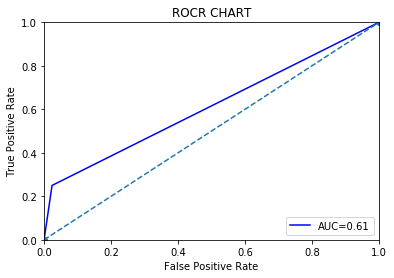

In [149]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


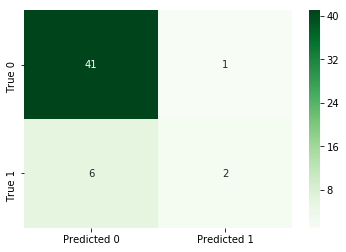

In [150]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [151]:
lex_file = pd.read_csv("AFINN-111.csv", sep=',', engine='python')

In [152]:
lex_file.head()

,words,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [153]:
type(lex_file)

pandas.core.frame.DataFrame

In [154]:
#Converting dataframe into dictionary
lexicons = dict(zip(lex_file.words,lex_file.score))

In [155]:
print(lexicons)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [156]:
lexicons["abandon"]

-2

In [157]:
#lexicons = {}
#records = lex_file.readlines()
#for record in lex_file:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) # to remove new line charecter
    #lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
#print(lexicons)
#lexicons["abandon"]

In [158]:
#For each tweet
#For each word in tweet
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
    for tweet in tokenized_message_test:
    score = 0
    for word in tweet:
        if word in lexicons:
            score = score + lexicons[word]
    strength.append(score)
    if (score >= 0 ):
        prediction.append('ham')
    else:
        prediction.append('spam')
print(strength)
print(prediction)

[0, 3, 0, -2, 0, 4, 2, 0, 0, 0, -2, 0, 0, 0, -5, -2, 0, 0, 0, -1, 0, 0, 0, 1, 0, 1, -2, 0, 1, 0, -5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 0, 2, 0, -3]
['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam']


In [159]:
#Get the columns of data
class_label= []
corpus = []
for record in test_list :
    corpus.append(record[0])
    class_label.append(record[1])
print(corpus)
print(class_label)

["'good stuff", "'07732584351 rodger burns tried call your reply free nokia mobile free camcorder. please call 08000930705 delivery tomorrow'", "'winner!! valued network customer have been selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid hours only.'", "'you everywhere dirt", "'tell where reached'", "know! grumpy people. like better lying. then again always play jokes...'", "'i\\'m like things. scared like mah. said loud.'", "early hor... already then say...'", "'its part checking", '', "'yes started send requests make pain came back i\\'m back bed. double coins factory too. gotta cash nitros.'", "calls..messages..missed calls'", 'call just', "'watching telugu movie..wat", "'your gonna have pick burger yourself your home. can\\'t even move. pain killing me.'", "'sorry pain. meet another night? spent late afternoon casualty that means haven\\'t done stuff42moro that includes time sheets that. sorry.", '\'hi. been hols now! run. forgot that have hairdr

In [160]:
corpus_list = {'data':corpus}
labels = {'label':class_label}
senti_strength = {'senti_strength':strength}

In [161]:
#Create an Analysis Base Table (ABT)
senti_matrix = pd.DataFrame(corpus_list, strength)
senti_matrix['Label'] = class_label
senti_matrix['prediction']=prediction


In [162]:
senti_matrix.columns

Index(['data', 'Label', 'prediction'], dtype='object')

In [163]:
senti_matrix[0:5]

,data,Label,prediction
0,'good stuff,0,ham
3,'07732584351 rodger burns tried call your repl...,1,ham
0,'winner!! valued network customer have been se...,1,ham
-2,'you everywhere dirt,0,spam
0,'tell where reached',0,ham


In [164]:
Matrix_Table = pd.pivot_table(senti_matrix,index=['prediction','Label'], aggfunc = 'count')
Matrix_Table

data
prediction Label      
ham        0        34
           1         8
spam       0         8

#TextBlob Naive Bayes Classifier

In [165]:
test_list = list(map(tuple,test.values))
test_list[0:4]

[("'good stuff", 0),
 ("'07732584351 rodger burns tried call your reply free nokia mobile free camcorder. please call 08000930705 delivery tomorrow'",
  1),
 ("'winner!! valued network customer have been selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid hours only.'",
  1),
 ("'you everywhere dirt", 0)]

In [166]:
train_list = list(map(tuple,train.values))
train_list[0:4]

[("your request \\'melle melle (oru minnaminunginte nurungu vettam)\\' been your callertune callers. press copy your friends callertune'",
  0),
 ("'haha awesome", 0),
 ("'i\\'m gonna home soon don\\'t want talk about this stuff anymore tonight",
  0),
 ("see. when finish have loads loans pay'", 0)]

In [167]:
from textblob.classifiers import NaiveBayesClassifier

In [168]:
cl = NaiveBayesClassifier(train_list)

In [169]:
cl.accuracy(train_list)

0.9666666666666667

In [170]:
cl.accuracy(test_list)

0.88

In [171]:
cl.show_informative_features(40)

Most Informative Features
        contains(please) = True                1 : 0      =     14.5 : 1.0
       contains(contact) = True                1 : 0      =     11.3 : 1.0
          contains(free) = True                1 : 0      =      8.7 : 1.0
          contains(from) = True                1 : 0      =      8.7 : 1.0
          contains(more) = True                1 : 0      =      8.1 : 1.0
          contains(send) = True                1 : 0      =      8.1 : 1.0
          contains(call) = True                1 : 0      =      7.1 : 1.0
          contains(text) = True                1 : 0      =      6.8 : 1.0
         contains(reply) = True                1 : 0      =      6.8 : 1.0
         contains(speak) = True                1 : 0      =      4.8 : 1.0
         contains(which) = True                1 : 0      =      4.8 : 1.0
          contains(dont) = True                1 : 0      =      4.8 : 1.0
          contains(year) = True                1 : 0      =      4.8 : 1.0